In [7]:
#Reload the solutions
import pickle

#result test_y
with open("y_test_57.pkl", "rb") as fp:
    True_Results= pickle.load(fp)
    
#predictions based on one stems (Uno-Based)

with open("Integrated_prediction_ub_test57.pkl", "rb") as fp:
    Predicts_ub= pickle.load(fp)
    
#predictions based on combinaton of stems (Combination-Based)

with open("Integrated_prediction_cb_test57.pkl", "rb") as fp:
    Predicts_cb= pickle.load(fp)
    
#predictions based on prediction model with hypermetre

with open("Integrated_prediction_hype1_test57.pkl", "rb") as fp:
    Predicts_hype= pickle.load(fp)

#predcitions by NAYN.com

with open("NAYN_predicted_test57.pkl", "rb") as fp:
    Predicts_NAYN= pickle.load(fp)
    
    
    
   
    


In [14]:
# a function from result to prediction

import pandas as pd
def result_to_predict(result,j):
    p=[]
    for i in result:
        p.append(i[j])
        
    predict=pd.Series(p,index=result.index)
    return predict

In [23]:
from sklearn.metrics import confusion_matrix,  accuracy_score

def acc_sc_list(test,result):
    n=len(result[result.index[0]])
    output=[]
    for i in range(0,n):
        output.append(round(accuracy_score(test,result_to_predict(result,i)),4))
        
        
    return output

In [36]:
main_categories=["DÜNYA","SPOR","SANAT","Teknoloji"]

acc_score_ub=acc_sc_list(True_Results,Predicts_ub)


acc_all_with_ub=[acc_score_ub]

for category in main_categories:
    cat_ind=True_Results[True_Results==category].index
    cat_test_y=True_Results[cat_ind]
    cat_results=Predicts_ub[cat_ind]
    acc_all_with_ub.append(acc_sc_list(cat_test_y,cat_results))
    





In [37]:
acc_all_with_ub

[[0.7927, 0.6727, 0.8366, 0.8938, 0.5535],
 [0.8192, 0.6455, 0.9978, 0.9902, 0.5228],
 [0.782, 0.7995, 0.2682, 0.614, 0.6892],
 [0.375, 0.6964, 0.0, 0.1607, 0.5893],
 [0.0357, 0.6071, 0.0, 0.0, 0.5714]]

In [39]:
acc_score_cb=acc_sc_list(True_Results,Predicts_cb)


acc_all_with_cb=[acc_score_cb]

for category in main_categories:
    cat_ind=True_Results[True_Results==category].index
    cat_test_y=True_Results[cat_ind]
    cat_results=Predicts_cb[cat_ind]
    acc_all_with_cb.append(acc_sc_list(cat_test_y,cat_results))

In [40]:
acc_all_with_cb

[[0.6069, 0.7153, 0.8503, 0.8211, 0.5763],
 [0.6536, 0.6982, 0.9528, 0.9799, 0.5304],
 [0.4561, 0.812, 0.5363, 0.2556, 0.7719],
 [0.4107, 0.7321, 0.1429, 0.0357, 0.7143],
 [0.0714, 0.4286, 0.0, 0.0, 0.5357]]

In [52]:
tr=True_Results
pN=Predicts_NAYN
Nayn_All=round(accuracy_score(tr,pN),4)
DUNYA_index=tr[tr==main_categories[0]].index
Nayn_DUNYA=round(accuracy_score(tr[DUNYA_index],pN[DUNYA_index]),4)

DUNYA_index=tr[tr==main_categories[0]].index
Nayn_DUNYA=round(accuracy_score(tr[DUNYA_index],pN[DUNYA_index]),4)


In [51]:
tr[tr==main_categories[0]].index

Int64Index([42308, 19743, 26134, 36274, 39013, 38035, 37518, 27047, 37017,
            20660,
            ...
            31093, 14875, 31709, 24263, 39970, 19154, 19512, 23092, 17335,
            22839],
           dtype='int64', length=1842)

In [25]:
acc_all_with_hype

[[0.5256,
  0.5282,
  0.5346,
  0.5424,
  0.5424,
  0.5535,
  0.5617,
  0.5677,
  0.5712,
  0.6125,
  0.5256],
 [0.5185,
  0.5174,
  0.5201,
  0.5195,
  0.513,
  0.5228,
  0.5223,
  0.5168,
  0.5125,
  0.5662,
  0.5185],
 [0.5664,
  0.5865,
  0.609,
  0.6441,
  0.6692,
  0.6892,
  0.7419,
  0.782,
  0.8095,
  0.817,
  0.5664],
 [0.5536,
  0.5536,
  0.5714,
  0.5893,
  0.5893,
  0.5893,
  0.5714,
  0.6607,
  0.7321,
  0.6429,
  0.5536],
 [0.3571,
  0.3571,
  0.3571,
  0.5,
  0.5714,
  0.5714,
  0.5714,
  0.6786,
  0.7143,
  0.6786,
  0.3571]]

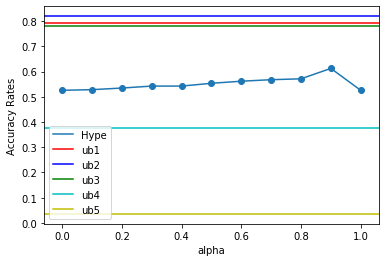

In [38]:
import numpy as np
import matplotlib.pyplot as plt
x=[ round(i*0.1,1) for i in range(0,11) ]

plt.plot(x, acc_all_with_hype[0],label = "Hype")
plt.scatter(x, acc_all_with_hype[0])

plt.axhline(y=acc_all_with_ub[0][0],color='r', linestyle='-',label = "ub1")
plt.axhline(y=acc_all_with_ub[1][0],color='b', linestyle='-',label = "ub2")
plt.axhline(y=acc_all_with_ub[2][0],color='g', linestyle='-',label = "ub3")
plt.axhline(y=acc_all_with_ub[3][0],color='c', linestyle='-',label = "ub4")
plt.axhline(y=acc_all_with_ub[4][0],color='y', linestyle='-',label = "ub5")

plt.xlabel("alpha")
plt.ylabel("Accuracy Rates")

plt.legend()
plt.show()

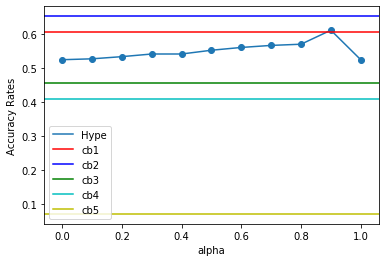

In [41]:
import numpy as np
import matplotlib.pyplot as plt
x=[ round(i*0.1,1) for i in range(0,11) ]

plt.plot(x, acc_all_with_hype[0],label = "Hype")
plt.scatter(x, acc_all_with_hype[0])

plt.axhline(y=acc_all_with_cb[0][0],color='r', linestyle='-',label = "cb1")
plt.axhline(y=acc_all_with_cb[1][0],color='b', linestyle='-',label = "cb2")
plt.axhline(y=acc_all_with_cb[2][0],color='g', linestyle='-',label = "cb3")
plt.axhline(y=acc_all_with_cb[3][0],color='c', linestyle='-',label = "cb4")
plt.axhline(y=acc_all_with_cb[4][0],color='y', linestyle='-',label = "cb5")

plt.xlabel("alpha")
plt.ylabel("Accuracy Rates")

plt.legend()
plt.show()